In [24]:
import torch
from diffusers.utils import make_image_grid
from IPython.display import display, clear_output
from PIL import Image
from slideredit.pipelines import SliderEditFluxKontextPipeline
from itertools import product

## GSTLoRA

In [ ]:
pipe = SliderEditFluxKontextPipeline.from_pretrained("black-forest-labs/FLUX.1-Kontext-dev", torch_dtype=torch.bfloat16).to("cuda")
pipe.load_gstlora("./checkpoints/example_training_gstlora_iter500.safetensors")
clear_output()
print("Pipeline with GSTLoRA loaded successfully!")

Pipeline with GSTLoRA loaded successfully!


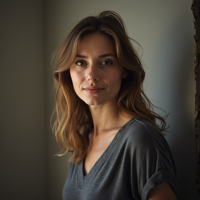

Edit prompt: make the hair of the person curly


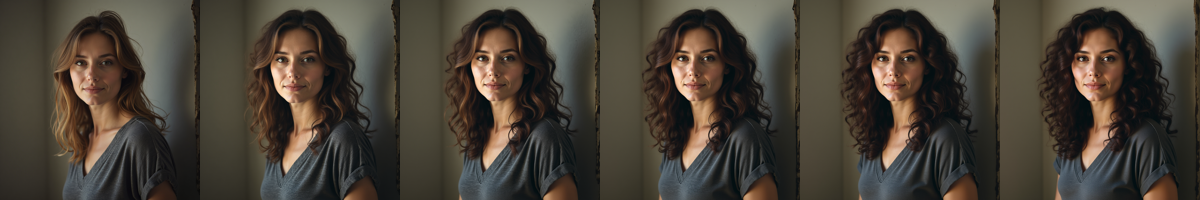

In [10]:
img = Image.open("./datasets/slideredit_faces_dataset/woman_7.png")
edit_prompt = "make the hair of the person curly"
alpha_values = [1, 0.8, 0.5, 0, -0.5, -1]

outputs = []
for alpha in alpha_values:
    output_image = pipe(
        image=img,  
        prompt=edit_prompt,
        generator=torch.Generator().manual_seed(0),
        slider_alpha=alpha,
    ).images[0]
    outputs.append(output_image)

clear_output()
display(img.resize((200, 200)))
print(f"Edit prompt: {edit_prompt}")
make_image_grid([x.resize((200, 200)) for x in outputs], rows=1, cols=len(outputs))

## STLoRA

In [ ]:
pipe.load_stlora("./checkpoints/example_training_stlora_iter1200.pt", lora_rank=16, lora_dropout=0.0)
clear_output()
print("Pipeline with STLoRA loaded successfully!")

Pipeline with STLoRA loaded successfully!


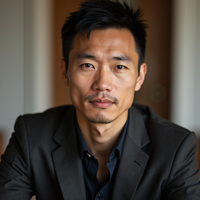

Edit prompt: make the person fat and make the person laugh


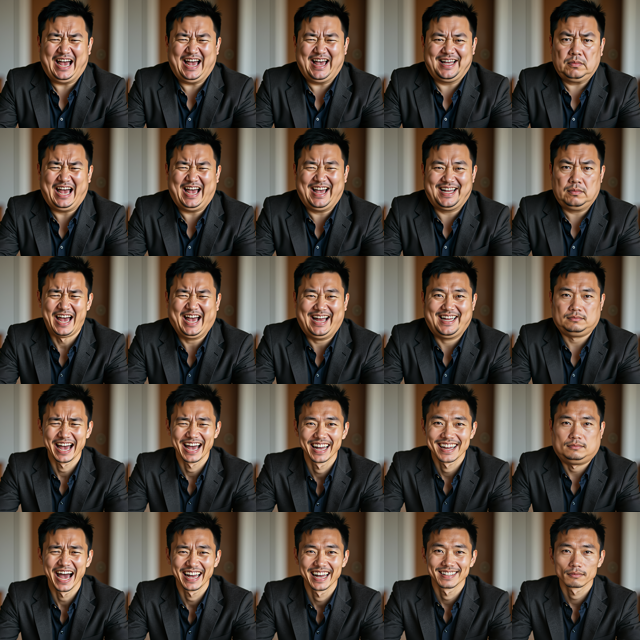

In [ ]:
img = Image.open("./datasets/slideredit_faces_dataset/asian man_15.png")
edit_prompt = "make the person fat and make the person laugh"
edit_subprompts = ["make the person fat", "make the person laugh"]
alpha_values_list = product([-1, -0.5, 0, 0.5, 1], repeat=2)

outputs = []
for alpha_values in alpha_values_list:
    output_image = pipe(
        image=img,
        prompt=edit_prompt,
        generator=torch.Generator().manual_seed(0),
        subprompts_list=edit_subprompts,
        slider_alpha_list=alpha_values,
    ).images[0]
    outputs.append(output_image)

clear_output()
display(img.resize((200, 200)))
print(f"Edit prompt: {edit_prompt}")
make_image_grid([x.resize((128, 128)) for x in outputs], rows=5, cols=5)